## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.2ms	remaining: 52.1s
1:	learn: 0.9301086	total: 56ms	remaining: 28s
2:	learn: 0.9005637	total: 59.6ms	remaining: 19.8s
3:	learn: 0.8720983	total: 62.7ms	remaining: 15.6s
4:	learn: 0.8467410	total: 65.6ms	remaining: 13.1s
5:	learn: 0.8226672	total: 68.6ms	remaining: 11.4s
6:	learn: 0.7994702	total: 71.5ms	remaining: 10.1s
7:	learn: 0.7784272	total: 74.4ms	remaining: 9.22s
8:	learn: 0.7602192	total: 77.5ms	remaining: 8.53s
9:	learn: 0.7412421	total: 80.9ms	remaining: 8.01s
10:	learn: 0.7247930	total: 84ms	remaining: 7.55s
11:	learn: 0.7089951	total: 87.2ms	remaining: 7.18s
12:	learn: 0.6951345	total: 90.1ms	remaining: 6.84s
13:	learn: 0.6809276	total: 93.1ms	remaining: 6.55s
14:	learn: 0.6692630	total: 96ms	remaining: 6.3s
15:	learn: 0.6588323	total: 98.9ms	remaining: 6.08s
16:	learn: 0.6472700	total: 102ms	remaining: 5.88s
17:	learn: 0.6379982	total: 105ms	remaining: 5.71s
18:	learn: 0.6294674	total: 108ms	remaining: 5.57s
19:	

41:	learn: 0.5170220	total: 185ms	remaining: 4.22s
42:	learn: 0.5141148	total: 188ms	remaining: 4.19s
43:	learn: 0.5116444	total: 191ms	remaining: 4.15s
44:	learn: 0.5100547	total: 193ms	remaining: 4.11s
45:	learn: 0.5069096	total: 196ms	remaining: 4.07s
46:	learn: 0.5051685	total: 199ms	remaining: 4.04s
47:	learn: 0.5033968	total: 202ms	remaining: 4s
48:	learn: 0.5012433	total: 205ms	remaining: 3.97s
49:	learn: 0.4986132	total: 208ms	remaining: 3.95s
50:	learn: 0.4968022	total: 211ms	remaining: 3.92s
51:	learn: 0.4951632	total: 213ms	remaining: 3.89s
52:	learn: 0.4928924	total: 216ms	remaining: 3.86s
53:	learn: 0.4917272	total: 219ms	remaining: 3.84s
54:	learn: 0.4895079	total: 222ms	remaining: 3.82s
55:	learn: 0.4881884	total: 225ms	remaining: 3.8s
56:	learn: 0.4861566	total: 228ms	remaining: 3.78s
57:	learn: 0.4850201	total: 231ms	remaining: 3.76s
58:	learn: 0.4840055	total: 234ms	remaining: 3.74s
59:	learn: 0.4824455	total: 237ms	remaining: 3.72s
60:	learn: 0.4809744	total: 240ms	r

106:	learn: 0.4451085	total: 376ms	remaining: 3.14s
107:	learn: 0.4447909	total: 379ms	remaining: 3.13s
108:	learn: 0.4440936	total: 382ms	remaining: 3.12s
109:	learn: 0.4435519	total: 385ms	remaining: 3.11s
110:	learn: 0.4431075	total: 387ms	remaining: 3.1s
111:	learn: 0.4425498	total: 390ms	remaining: 3.09s
112:	learn: 0.4419106	total: 393ms	remaining: 3.08s
113:	learn: 0.4414425	total: 395ms	remaining: 3.07s
114:	learn: 0.4407446	total: 398ms	remaining: 3.06s
115:	learn: 0.4402011	total: 401ms	remaining: 3.05s
116:	learn: 0.4398559	total: 403ms	remaining: 3.04s
117:	learn: 0.4392990	total: 406ms	remaining: 3.03s
118:	learn: 0.4389153	total: 409ms	remaining: 3.02s
119:	learn: 0.4383331	total: 411ms	remaining: 3.02s
120:	learn: 0.4378136	total: 414ms	remaining: 3.01s
121:	learn: 0.4375553	total: 417ms	remaining: 3s
122:	learn: 0.4369995	total: 419ms	remaining: 2.99s
123:	learn: 0.4366325	total: 422ms	remaining: 2.98s
124:	learn: 0.4362823	total: 425ms	remaining: 2.97s
125:	learn: 0.43

174:	learn: 0.4144190	total: 566ms	remaining: 2.67s
175:	learn: 0.4140875	total: 569ms	remaining: 2.67s
176:	learn: 0.4136755	total: 572ms	remaining: 2.66s
177:	learn: 0.4133860	total: 575ms	remaining: 2.65s
178:	learn: 0.4129780	total: 578ms	remaining: 2.65s
179:	learn: 0.4122907	total: 581ms	remaining: 2.65s
180:	learn: 0.4119188	total: 584ms	remaining: 2.64s
181:	learn: 0.4115412	total: 587ms	remaining: 2.64s
182:	learn: 0.4112620	total: 590ms	remaining: 2.63s
183:	learn: 0.4107734	total: 593ms	remaining: 2.63s
184:	learn: 0.4104881	total: 595ms	remaining: 2.62s
185:	learn: 0.4100009	total: 598ms	remaining: 2.62s
186:	learn: 0.4096453	total: 601ms	remaining: 2.61s
187:	learn: 0.4093395	total: 604ms	remaining: 2.61s
188:	learn: 0.4090020	total: 607ms	remaining: 2.6s
189:	learn: 0.4085981	total: 610ms	remaining: 2.6s
190:	learn: 0.4082397	total: 613ms	remaining: 2.6s
191:	learn: 0.4079846	total: 616ms	remaining: 2.59s
192:	learn: 0.4076364	total: 618ms	remaining: 2.59s
193:	learn: 0.4

239:	learn: 0.3935463	total: 758ms	remaining: 2.4s
240:	learn: 0.3933166	total: 760ms	remaining: 2.39s
241:	learn: 0.3930992	total: 763ms	remaining: 2.39s
242:	learn: 0.3928898	total: 766ms	remaining: 2.38s
243:	learn: 0.3926199	total: 768ms	remaining: 2.38s
244:	learn: 0.3923955	total: 771ms	remaining: 2.38s
245:	learn: 0.3922312	total: 774ms	remaining: 2.37s
246:	learn: 0.3919499	total: 777ms	remaining: 2.37s
247:	learn: 0.3917420	total: 780ms	remaining: 2.36s
248:	learn: 0.3915186	total: 782ms	remaining: 2.36s
249:	learn: 0.3912759	total: 786ms	remaining: 2.36s
250:	learn: 0.3908375	total: 789ms	remaining: 2.35s
251:	learn: 0.3904815	total: 792ms	remaining: 2.35s
252:	learn: 0.3902127	total: 795ms	remaining: 2.35s
253:	learn: 0.3900274	total: 798ms	remaining: 2.34s
254:	learn: 0.3898171	total: 801ms	remaining: 2.34s
255:	learn: 0.3896180	total: 804ms	remaining: 2.34s
256:	learn: 0.3894251	total: 807ms	remaining: 2.33s
257:	learn: 0.3892139	total: 810ms	remaining: 2.33s
258:	learn: 0

305:	learn: 0.3784406	total: 948ms	remaining: 2.15s
306:	learn: 0.3782934	total: 952ms	remaining: 2.15s
307:	learn: 0.3781631	total: 954ms	remaining: 2.14s
308:	learn: 0.3779278	total: 957ms	remaining: 2.14s
309:	learn: 0.3777358	total: 960ms	remaining: 2.14s
310:	learn: 0.3775809	total: 963ms	remaining: 2.13s
311:	learn: 0.3774323	total: 966ms	remaining: 2.13s
312:	learn: 0.3772732	total: 969ms	remaining: 2.13s
313:	learn: 0.3771184	total: 971ms	remaining: 2.12s
314:	learn: 0.3769370	total: 974ms	remaining: 2.12s
315:	learn: 0.3766643	total: 977ms	remaining: 2.11s
316:	learn: 0.3764891	total: 980ms	remaining: 2.11s
317:	learn: 0.3762751	total: 982ms	remaining: 2.11s
318:	learn: 0.3761284	total: 985ms	remaining: 2.1s
319:	learn: 0.3760168	total: 988ms	remaining: 2.1s
320:	learn: 0.3757763	total: 991ms	remaining: 2.1s
321:	learn: 0.3756076	total: 995ms	remaining: 2.09s
322:	learn: 0.3754123	total: 997ms	remaining: 2.09s
323:	learn: 0.3751852	total: 1s	remaining: 2.09s
324:	learn: 0.3750

372:	learn: 0.3668381	total: 1.14s	remaining: 1.91s
373:	learn: 0.3666564	total: 1.14s	remaining: 1.91s
374:	learn: 0.3663789	total: 1.14s	remaining: 1.91s
375:	learn: 0.3661576	total: 1.15s	remaining: 1.9s
376:	learn: 0.3659742	total: 1.15s	remaining: 1.9s
377:	learn: 0.3658330	total: 1.15s	remaining: 1.9s
378:	learn: 0.3656680	total: 1.16s	remaining: 1.89s
379:	learn: 0.3654606	total: 1.16s	remaining: 1.89s
380:	learn: 0.3651842	total: 1.16s	remaining: 1.89s
381:	learn: 0.3650538	total: 1.16s	remaining: 1.88s
382:	learn: 0.3649246	total: 1.17s	remaining: 1.88s
383:	learn: 0.3647854	total: 1.17s	remaining: 1.88s
384:	learn: 0.3646814	total: 1.17s	remaining: 1.87s
385:	learn: 0.3645091	total: 1.18s	remaining: 1.87s
386:	learn: 0.3643695	total: 1.18s	remaining: 1.87s
387:	learn: 0.3641687	total: 1.18s	remaining: 1.86s
388:	learn: 0.3640529	total: 1.18s	remaining: 1.86s
389:	learn: 0.3639296	total: 1.19s	remaining: 1.86s
390:	learn: 0.3637044	total: 1.19s	remaining: 1.85s
391:	learn: 0.3

435:	learn: 0.3568416	total: 1.33s	remaining: 1.72s
436:	learn: 0.3566846	total: 1.34s	remaining: 1.72s
437:	learn: 0.3565875	total: 1.34s	remaining: 1.72s
438:	learn: 0.3564768	total: 1.34s	remaining: 1.72s
439:	learn: 0.3563559	total: 1.35s	remaining: 1.71s
440:	learn: 0.3561557	total: 1.35s	remaining: 1.71s
441:	learn: 0.3559793	total: 1.35s	remaining: 1.71s
442:	learn: 0.3558695	total: 1.36s	remaining: 1.71s
443:	learn: 0.3557039	total: 1.36s	remaining: 1.71s
444:	learn: 0.3555934	total: 1.37s	remaining: 1.71s
445:	learn: 0.3553700	total: 1.37s	remaining: 1.7s
446:	learn: 0.3553048	total: 1.37s	remaining: 1.7s
447:	learn: 0.3550824	total: 1.38s	remaining: 1.69s
448:	learn: 0.3549146	total: 1.38s	remaining: 1.69s
449:	learn: 0.3548607	total: 1.38s	remaining: 1.69s
450:	learn: 0.3546809	total: 1.38s	remaining: 1.68s
451:	learn: 0.3545787	total: 1.39s	remaining: 1.68s
452:	learn: 0.3544310	total: 1.39s	remaining: 1.68s
453:	learn: 0.3543210	total: 1.39s	remaining: 1.67s
454:	learn: 0.

501:	learn: 0.3476142	total: 1.53s	remaining: 1.51s
502:	learn: 0.3474667	total: 1.53s	remaining: 1.51s
503:	learn: 0.3473844	total: 1.53s	remaining: 1.51s
504:	learn: 0.3471852	total: 1.53s	remaining: 1.5s
505:	learn: 0.3471124	total: 1.54s	remaining: 1.5s
506:	learn: 0.3469987	total: 1.54s	remaining: 1.5s
507:	learn: 0.3469000	total: 1.54s	remaining: 1.5s
508:	learn: 0.3467621	total: 1.55s	remaining: 1.49s
509:	learn: 0.3466653	total: 1.55s	remaining: 1.49s
510:	learn: 0.3465795	total: 1.55s	remaining: 1.49s
511:	learn: 0.3464899	total: 1.55s	remaining: 1.48s
512:	learn: 0.3463711	total: 1.56s	remaining: 1.48s
513:	learn: 0.3462483	total: 1.56s	remaining: 1.48s
514:	learn: 0.3460733	total: 1.56s	remaining: 1.47s
515:	learn: 0.3459427	total: 1.57s	remaining: 1.47s
516:	learn: 0.3458363	total: 1.57s	remaining: 1.47s
517:	learn: 0.3456145	total: 1.57s	remaining: 1.46s
518:	learn: 0.3455174	total: 1.57s	remaining: 1.46s
519:	learn: 0.3453867	total: 1.58s	remaining: 1.46s
520:	learn: 0.34

569:	learn: 0.3393241	total: 1.72s	remaining: 1.3s
570:	learn: 0.3392368	total: 1.72s	remaining: 1.29s
571:	learn: 0.3391373	total: 1.72s	remaining: 1.29s
572:	learn: 0.3390261	total: 1.73s	remaining: 1.29s
573:	learn: 0.3389126	total: 1.73s	remaining: 1.28s
574:	learn: 0.3388268	total: 1.73s	remaining: 1.28s
575:	learn: 0.3387474	total: 1.74s	remaining: 1.28s
576:	learn: 0.3386361	total: 1.74s	remaining: 1.27s
577:	learn: 0.3385706	total: 1.74s	remaining: 1.27s
578:	learn: 0.3384814	total: 1.74s	remaining: 1.27s
579:	learn: 0.3383559	total: 1.75s	remaining: 1.26s
580:	learn: 0.3382469	total: 1.75s	remaining: 1.26s
581:	learn: 0.3381645	total: 1.75s	remaining: 1.26s
582:	learn: 0.3380538	total: 1.75s	remaining: 1.25s
583:	learn: 0.3379690	total: 1.76s	remaining: 1.25s
584:	learn: 0.3378924	total: 1.76s	remaining: 1.25s
585:	learn: 0.3378307	total: 1.76s	remaining: 1.25s
586:	learn: 0.3377186	total: 1.76s	remaining: 1.24s
587:	learn: 0.3376434	total: 1.77s	remaining: 1.24s
588:	learn: 0

631:	learn: 0.3331129	total: 1.91s	remaining: 1.11s
632:	learn: 0.3330288	total: 1.91s	remaining: 1.11s
633:	learn: 0.3328844	total: 1.92s	remaining: 1.1s
634:	learn: 0.3328544	total: 1.92s	remaining: 1.1s
635:	learn: 0.3327021	total: 1.92s	remaining: 1.1s
636:	learn: 0.3326462	total: 1.92s	remaining: 1.1s
637:	learn: 0.3325758	total: 1.93s	remaining: 1.09s
638:	learn: 0.3324324	total: 1.93s	remaining: 1.09s
639:	learn: 0.3323174	total: 1.93s	remaining: 1.09s
640:	learn: 0.3322206	total: 1.93s	remaining: 1.08s
641:	learn: 0.3321031	total: 1.94s	remaining: 1.08s
642:	learn: 0.3319978	total: 1.94s	remaining: 1.08s
643:	learn: 0.3319044	total: 1.94s	remaining: 1.07s
644:	learn: 0.3318169	total: 1.95s	remaining: 1.07s
645:	learn: 0.3316585	total: 1.95s	remaining: 1.07s
646:	learn: 0.3316256	total: 1.95s	remaining: 1.06s
647:	learn: 0.3315220	total: 1.95s	remaining: 1.06s
648:	learn: 0.3313829	total: 1.96s	remaining: 1.06s
649:	learn: 0.3313125	total: 1.96s	remaining: 1.05s
650:	learn: 0.33

695:	learn: 0.3269516	total: 2.1s	remaining: 918ms
696:	learn: 0.3267980	total: 2.1s	remaining: 915ms
697:	learn: 0.3266887	total: 2.11s	remaining: 912ms
698:	learn: 0.3265888	total: 2.11s	remaining: 909ms
699:	learn: 0.3265229	total: 2.11s	remaining: 905ms
700:	learn: 0.3264350	total: 2.12s	remaining: 902ms
701:	learn: 0.3263223	total: 2.12s	remaining: 899ms
702:	learn: 0.3262539	total: 2.12s	remaining: 896ms
703:	learn: 0.3261258	total: 2.12s	remaining: 893ms
704:	learn: 0.3260520	total: 2.13s	remaining: 890ms
705:	learn: 0.3259475	total: 2.13s	remaining: 887ms
706:	learn: 0.3258911	total: 2.13s	remaining: 884ms
707:	learn: 0.3257903	total: 2.13s	remaining: 881ms
708:	learn: 0.3256952	total: 2.14s	remaining: 878ms
709:	learn: 0.3255982	total: 2.14s	remaining: 875ms
710:	learn: 0.3255301	total: 2.14s	remaining: 872ms
711:	learn: 0.3254442	total: 2.15s	remaining: 869ms
712:	learn: 0.3253361	total: 2.15s	remaining: 866ms
713:	learn: 0.3252431	total: 2.15s	remaining: 863ms
714:	learn: 0.

757:	learn: 0.3215306	total: 2.29s	remaining: 732ms
758:	learn: 0.3214274	total: 2.3s	remaining: 729ms
759:	learn: 0.3212014	total: 2.3s	remaining: 726ms
760:	learn: 0.3211190	total: 2.3s	remaining: 723ms
761:	learn: 0.3210312	total: 2.31s	remaining: 720ms
762:	learn: 0.3209495	total: 2.31s	remaining: 717ms
763:	learn: 0.3208564	total: 2.31s	remaining: 714ms
764:	learn: 0.3207911	total: 2.32s	remaining: 712ms
765:	learn: 0.3206643	total: 2.32s	remaining: 709ms
766:	learn: 0.3205891	total: 2.32s	remaining: 706ms
767:	learn: 0.3204765	total: 2.33s	remaining: 702ms
768:	learn: 0.3203840	total: 2.33s	remaining: 699ms
769:	learn: 0.3203086	total: 2.33s	remaining: 696ms
770:	learn: 0.3202066	total: 2.33s	remaining: 693ms
771:	learn: 0.3200935	total: 2.34s	remaining: 690ms
772:	learn: 0.3200251	total: 2.34s	remaining: 687ms
773:	learn: 0.3199577	total: 2.34s	remaining: 684ms
774:	learn: 0.3198837	total: 2.34s	remaining: 681ms
775:	learn: 0.3198135	total: 2.35s	remaining: 678ms
776:	learn: 0.3

819:	learn: 0.3160986	total: 2.49s	remaining: 547ms
820:	learn: 0.3159951	total: 2.49s	remaining: 543ms
821:	learn: 0.3159403	total: 2.5s	remaining: 540ms
822:	learn: 0.3158160	total: 2.5s	remaining: 537ms
823:	learn: 0.3157523	total: 2.5s	remaining: 534ms
824:	learn: 0.3156673	total: 2.5s	remaining: 531ms
825:	learn: 0.3156288	total: 2.51s	remaining: 528ms
826:	learn: 0.3155257	total: 2.51s	remaining: 525ms
827:	learn: 0.3154546	total: 2.51s	remaining: 522ms
828:	learn: 0.3153664	total: 2.51s	remaining: 519ms
829:	learn: 0.3152896	total: 2.52s	remaining: 516ms
830:	learn: 0.3152050	total: 2.52s	remaining: 513ms
831:	learn: 0.3151385	total: 2.52s	remaining: 510ms
832:	learn: 0.3150922	total: 2.53s	remaining: 506ms
833:	learn: 0.3149588	total: 2.53s	remaining: 503ms
834:	learn: 0.3149074	total: 2.53s	remaining: 500ms
835:	learn: 0.3148291	total: 2.54s	remaining: 497ms
836:	learn: 0.3147707	total: 2.54s	remaining: 494ms
837:	learn: 0.3147022	total: 2.54s	remaining: 491ms
838:	learn: 0.31

886:	learn: 0.3109334	total: 2.68s	remaining: 342ms
887:	learn: 0.3108347	total: 2.68s	remaining: 339ms
888:	learn: 0.3107647	total: 2.69s	remaining: 336ms
889:	learn: 0.3107302	total: 2.69s	remaining: 332ms
890:	learn: 0.3106509	total: 2.69s	remaining: 329ms
891:	learn: 0.3106139	total: 2.7s	remaining: 326ms
892:	learn: 0.3105421	total: 2.7s	remaining: 323ms
893:	learn: 0.3104659	total: 2.7s	remaining: 320ms
894:	learn: 0.3104028	total: 2.7s	remaining: 317ms
895:	learn: 0.3103186	total: 2.71s	remaining: 314ms
896:	learn: 0.3102488	total: 2.71s	remaining: 311ms
897:	learn: 0.3101565	total: 2.71s	remaining: 308ms
898:	learn: 0.3100955	total: 2.71s	remaining: 305ms
899:	learn: 0.3100512	total: 2.72s	remaining: 302ms
900:	learn: 0.3100138	total: 2.72s	remaining: 299ms
901:	learn: 0.3099635	total: 2.72s	remaining: 296ms
902:	learn: 0.3098989	total: 2.73s	remaining: 293ms
903:	learn: 0.3098084	total: 2.73s	remaining: 290ms
904:	learn: 0.3097402	total: 2.73s	remaining: 287ms
905:	learn: 0.30

951:	learn: 0.3063837	total: 2.87s	remaining: 145ms
952:	learn: 0.3063292	total: 2.87s	remaining: 142ms
953:	learn: 0.3062107	total: 2.87s	remaining: 139ms
954:	learn: 0.3061348	total: 2.88s	remaining: 136ms
955:	learn: 0.3060576	total: 2.88s	remaining: 133ms
956:	learn: 0.3059772	total: 2.88s	remaining: 130ms
957:	learn: 0.3058989	total: 2.88s	remaining: 127ms
958:	learn: 0.3057985	total: 2.89s	remaining: 123ms
959:	learn: 0.3056692	total: 2.89s	remaining: 120ms
960:	learn: 0.3055777	total: 2.89s	remaining: 117ms
961:	learn: 0.3054462	total: 2.9s	remaining: 114ms
962:	learn: 0.3053516	total: 2.9s	remaining: 111ms
963:	learn: 0.3052664	total: 2.9s	remaining: 108ms
964:	learn: 0.3052264	total: 2.9s	remaining: 105ms
965:	learn: 0.3051873	total: 2.91s	remaining: 102ms
966:	learn: 0.3051018	total: 2.91s	remaining: 99.3ms
967:	learn: 0.3050172	total: 2.91s	remaining: 96.3ms
968:	learn: 0.3049470	total: 2.92s	remaining: 93.3ms
969:	learn: 0.3049028	total: 2.92s	remaining: 90.3ms
970:	learn: 

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
141248.39718003152


#### Sanity Checks 

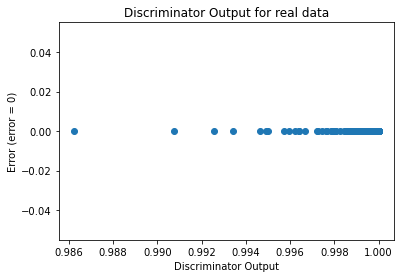

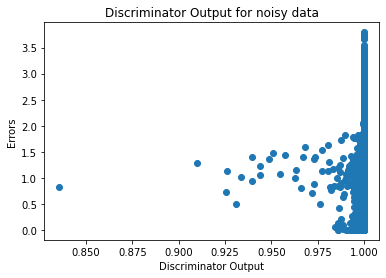

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)